In [2]:
import sys
import datetime
import time
import numpy as np
import pandas as pd
from datetime import date
today = str(date.today())

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


In [3]:
today

'2017-09-20'

In [4]:
# several parameters
axis_fontsize = 30
myrandom = 0
customthresh = 0.5

def mytime():
	ts = time.time()
	sttime = datetime.datetime.fromtimestamp(ts).strftime('%Y%m%d_%H:%M:%S')
	return sttime
print('starting at ', mytime(), flush=True)


starting at  20170920_18:24:50


In [5]:
def increase_axis_fontsize():
    ax = plt.gca()
    ticklabels = ax.get_xticklabels()
    for label in ticklabels:
        label.set_fontsize(axis_fontsize)
        label.set_family('serif')
    ticklabels = ax.get_yticklabels()
    for label in ticklabels:
        label.set_fontsize(axis_fontsize)
        label.set_family('serif')

In [6]:
def define_colors(mode='Sasha', NMFcomps=16):
    if (mode=='Sasha'):
        Comp_colors = ['red', 'tan', 'lime','blue','m','k','c', 'coral', 'indigo','darkgreen','orange','grey','gold', 'lightskyblue', 'peru', 'olive']
    elif (mode == 'Wouter'):
        Comp_colors = ["#A6CEE3", "#438EC0", "#63A8A0", "#98D277", "#3BA432", "#B89B74", "#F16667", "#E62F27", "#F9A963", "#FE982C", "#ED8F47", "#C3AAD2", "#7D54A5","#B9A499", "#EAD27A" ,"#B15928"]
    if (NMFcomps>16):
        from matplotlib import colors as mcolors
        colornames = list(mcolors.CSS4_COLORS.keys())
        count = 16
        while (count < NMFcomps):
            newcolor = colornames[np.random.randint(0,len(colornames))]
            trialcount = 0
            while ((newcolor in Comp_colors) and (trialcount < 100)):
                newcolor = colornames[np.random.randint(0,len(colornames))]
                trialcount+=1
            Comp_colors.append(newcolor)
            count+=1
    return Comp_colors

In [7]:
def make_bar_plot(Nrelevant, BarMatrix, bargraph_out, names = [], plotClusterMode=False, barsortorder=[], clusterTopLabels=[], myNMFcomps=16, colormode='Sasha'):
    if len(barsortorder)<1:
        barsortorder = np.arange(Nrelevant)
    if len(names) < 1:
        names = [str(i) for i in range(Nrelevant)]
        names = np.array(names)
    ttt = np.arange(Nrelevant)
    start = 0
    end = Nrelevant
    ground_pSample = ttt*0
    Comp_colors = define_colors(mode=colormode)
    plt.clf()
    plt.figure(figsize=(150,40))
    plt.bar(ttt[start:end], BarMatrix[0,start:end][barsortorder], color='r',
             bottom=ground_pSample[start:end], alpha=0.75)
    ground_pSample = BarMatrix[0,start:end][barsortorder]
    for i in range(1,myNMFcomps):
        plt.bar(ttt[start:end],BarMatrix[i,start:end][barsortorder], bottom = ground_pSample, color=Comp_colors[i], alpha=0.75)
        ground_pSample = np.sum(BarMatrix[0: i+1,start:end], axis=0)[barsortorder]
    increase_axis_fontsize()
    plt.ylabel('sum of signal in matrix',fontsize=70)
    #plt.title('Full Sample',fontsize=70)
    samplenamesize = 11
    samplenamesize = (1/Nrelevant)**0.5 * 300
    #thebottom = 0.15
    thebottom = (1/Nrelevant)**0.3 * 1.2
    if(plotClusterMode):
        plt.xticks(ttt, ttt.astype(str), rotation='vertical', fontsize=samplenamesize)
        if len(clusterTopLabels) > 0:
            ax = plt.gca()
            ax2 = ax.twiny()
            ax2.set_xticks(ttt)
            ax2.set_xticklabels(clusterTopLabels.astype(str), rotation=90, fontsize=samplenamesize)
            #ax.xaxis.tick_top()
            #plt.xticks(ttt, clusterTopLabels.astype(str), rotation='vertical', fontsize=samplenamesize)
    else:
        plt.xticks(ttt, names[barsortorder], rotation='vertical', fontsize=samplenamesize)	
    plot_margin = 5
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=thebottom)
    plt.savefig(bargraph_out)
    plt.close()	

# Simplest thing: just feed it basis matrix

In [7]:
Basis = np.load('/Volumes/home/amuratov/fun/70717/2017-07-07NMF_Ncomps16Basis.npy')

In [8]:
Basis

array([[ 0.        ,  0.0430855 ,  0.04238416, ...,  0.47084998,
         0.        ,  0.        ],
       [ 0.        ,  0.07346533,  0.08766832, ...,  0.        ,
         1.16180286,  0.        ],
       [ 0.        ,  0.21345594,  0.14744499, ...,  0.        ,
         0.        ,  0.02354311],
       ..., 
       [ 0.        ,  0.6278987 ,  0.31481887, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.2956552 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.05579656,  0.26910079, ...,  0.        ,
         0.        ,  0.        ]])

In [9]:
Basis.shape

(827, 16)

In [10]:
myNrelevant = Basis.shape[0]

In [11]:
myBargraphOut = 'lala.png'

In [26]:
make_bar_plot(myNrelevant, Basis.T, myBargraphOut)

# One component at a time

In [28]:
winning_component = np.argmax(Basis, axis=1)

In [29]:
winning_component

array([ 6, 14, 11, 11, 11, 11, 11,  6,  2,  2,  2,  7,  2, 13,  2,  2,  9,
        2,  2,  2,  2, 14, 14, 14,  2,  2,  2,  8,  8,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2,  2, 15,  9,  9,  1,  2,  1,  9,  2,  9,  6,  2,
        2,  2,  6,  9, 14, 15, 15,  2,  2,  5,  0,  5,  7,  6,  6, 12, 12,
       12, 12,  2,  9, 12,  9,  9,  9,  9, 13, 13,  9,  3,  3, 11, 11,  3,
        3, 11, 11,  9, 11, 11,  7,  7, 11, 11, 12, 13, 15, 15, 11, 11, 13,
       13, 13, 11, 11,  3,  2,  3, 11,  9, 11, 13, 13, 11, 11, 15,  8, 11,
       12, 12,  2, 13,  1,  2, 15, 15,  3,  1, 12, 11, 13, 15, 12, 15, 15,
       13, 13, 12, 11, 12,  1, 10, 11,  8,  2, 13, 11, 13,  3, 11,  2,  1,
       12, 12,  2,  3,  2, 11, 11, 11,  2, 11,  7,  7,  2, 11, 11,  3, 15,
       15, 15, 15, 12, 13,  5,  6,  6,  5,  5, 15, 15,  5, 13,  5,  5, 15,
        2, 11, 11,  7,  5, 13, 13, 13,  7,  2,  2,  6,  6,  2,  5,  5, 15,
        5,  5,  5,  5, 15, 15,  5,  5, 13,  5, 15,  9,  9,  9, 13,  5,  5,
        5,  5, 13,  2, 10

In [30]:
mangcut = winning_component==1

In [31]:
myBargraphOut = 'lala2.png'

In [32]:
make_bar_plot(len(mangcut[mangcut]), Basis[mangcut].T, myBargraphOut)

# lets get names

In [136]:
samplenames = pd.read_table('/Volumes/home/amuratov/fun/70717/colTitles_friendly.txt', header=None).values

In [137]:
samplenames

array([[1, 'vHMEC_DS18406'],
       [2, 'Trophoblast_DS19317'],
       [3, 'SKNDZ_DS21405'],
       ..., 
       [825, 'fKidney.R_DS20951'],
       [826, 'fSpinal.cord_DS20956'],
       [827, 'SKNDZ_DS21417']], dtype=object)

In [138]:
samplenames = samplenames[:,1]

In [38]:
samplenames

array(['vHMEC_DS18406', 'Trophoblast_DS19317', 'SKNDZ_DS21405',
       'SKNDZ_DS21399', 'SKNDZ_DS21387', 'Skin.Melanocytes_DS19662',
       'Skin.Melanocytes_DS18590', 'Skin.Keratinocytes_DS18692',
       'Pancreas_DS20842', 'Pancreas_DS20753', 'Ovary_DS20827',
       'iPS.19.11_DS15153', 'Heart_DS20383', 'MSC_DS21042',
       'Stomach.Mucosa_DS20260', 'Stomach.Mucosa_DS20748',
       'fThymus_DS19675', 'fStomach_DS20791', 'fStomach_DS20079',
       'fStomach_DS19933', 'fSpinal.cord_DS19260', 'fPlacenta_DS20346',
       'fPlacenta_DS21111', 'fPlacenta_DS20793', 'fOvary_DS17445',
       'fMuscle.arm_DS19439', 'fMuscle.leg_DS19382', 'fLung.R_DS21328',
       'fLung.L_DS21334', 'fKidney.R_DS20917', 'fKidney.R_DS21340',
       'fKidney.R_DS21044', 'fKidney.renal.cortex_DS20445',
       'fKidney.L_DS20920', 'fKidney.L_DS21344', 'fKidney.L_DS20953',
       'fKidney_DS21096', 'fKidney_DS20987', 'fAdrenal_DS19583',
       'fAdrenal_DS19395', 'CD34_DS12734', 'CD8_DS17885', 'CD4_DS17212',
      

In [45]:
make_bar_plot(len(mangcut[mangcut]), Basis[mangcut].T, 'lala3.png', names = samplenames[mangcut])

In [46]:
make_bar_plot(myNrelevant, Basis.T, 'lala4.png', names = samplenames)

# plot a random  group of DHS's 

In [9]:
Misture = np.load('/Volumes/home/amuratov/fun/70717/2017-07-07NMF_Ncomps16Mixture.npy')

In [11]:
MistureNorm = Misture/np.sum(Misture, axis=0)

In [16]:
MistureNorm[:,0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.02768889,  0.96468943,
        0.00762168])

In [17]:
winningDHS = np.argmax(Misture, axis=0)

In [50]:
winningDHS

array([14, 11, 11, ...,  3,  3,  3])

In [51]:
len(winningDHS)

2436300

In [52]:
group1DHScut = winningDHS == 1

In [53]:
len(group1DHScut[group1DHScut])

47878

In [54]:
possibleDHS = np.arange(len(winningDHS))[group1DHScut]

In [55]:
possibleDHS

array([    154,     155,     202, ..., 2435483, 2435484, 2435865])

In [56]:
np.random.choice(possibleDHS, 5)

array([   3626, 1988200, 1224139, 1742078,   24856])

In [57]:
group1DHScut

array([False, False, False, ..., False, False, False], dtype=bool)

In [60]:
group1DHScut[np.random.choice(possibleDHS, 5)]

array([ True,  True,  True,  True,  True], dtype=bool)

In [63]:
desiredDHS = np.random.choice(possibleDHS, 20)

In [65]:
desiredDHS

array([2233220,  146365,  126834, 1712257, 1566688, 1181886,  974304,
       1821608,  425641, 1576838, 1918429, 2138882,  183313,  576543,
       2239968,  890314,  375776, 1852998, 1350339, 1307771])

In [64]:
np.in1d(np.arange(len(winningDHS)), desiredDHS)

array([False, False, False, ..., False, False, False], dtype=bool)

In [68]:
VisualDHScut = np.in1d(np.arange(len(winningDHS)), desiredDHS)

In [67]:
Misture.shape

(16, 2436300)

In [70]:
Misture.T[VisualDHScut].T.shape

(16, 20)

In [71]:
make_bar_plot(20, Misture.T[VisualDHScut].T, 'lala5.png')

### totally random DHS

In [18]:
possibleDHS = np.arange(len(winningDHS))


In [19]:
desiredDHS = np.random.choice(possibleDHS, 827)

In [23]:
Misture.T[desiredDHS].shape

(827, 16)

In [30]:
DHSbarsortorder = np.array([])
for i in range(16):
    DHSbarsortorder = np.append(DHSbarsortorder, np.argwhere(winningDHS[desiredDHS]==i))
DHSbarsortorder = DHSbarsortorder.astype(int)


In [31]:
make_bar_plot(827, MistureNorm.T[desiredDHS].T, 'RandomDHSlalasorted.png', barsortorder= DHSbarsortorder)

# more formalized version, and normalized


## proof of concept for normalizign

In [72]:
testA = np.random.rand(10, 5)

In [76]:
testB = (testA.T / np.sum(testA, axis=1)).T

In [79]:
np.sum(testB[:,0])

1.0

In [84]:
testB = testB.T

In [85]:
testB.shape

(10, 5)

In [86]:
np.sum(testB[0])

1.0

In [87]:
testB[0]

array([ 0.05692208,  0.16108225,  0.49972766,  0.25630639,  0.02596162])

In [88]:
testA[0]

array([ 0.09546944,  0.27016638,  0.83814086,  0.42987586,  0.0435427 ])

## normalize basis and mixture such that each component vector adds up to 1

In [89]:
BasisNormed = (Basis.T / np.sum(Basis, axis=1)).T

In [91]:
MistureNormed = (Misture / np.sum(Misture.T, axis=1))

In [92]:
MistureNormed.shape

(16, 2436300)

In [93]:
np.sum(MistureNormed[:,0])

1.0

In [96]:
Ndesired = 100
group1DHScut = winningDHS == 1
possibleDHS = np.arange(len(winningDHS))[group1DHScut]
desiredDHS = np.random.choice(possibleDHS, Ndesired)
VisualDHScut = np.in1d(np.arange(len(winningDHS)), desiredDHS)
make_bar_plot(Ndesired, MistureNormed.T[VisualDHScut].T, 'lala6.png')

In [95]:
Ndesired = 100
group1DHScut = winningDHS == 1
possibleDHS = np.arange(len(winningDHS))[group1DHScut]
desiredDHS = np.random.choice(possibleDHS, Ndesired)
VisualDHScut = np.in1d(np.arange(len(winningDHS)), desiredDHS)
make_bar_plot(Ndesired, MistureNormed.T[VisualDHScut].T, 'lala7.png')

### how do you sort this? 

In [97]:
Ndesired = 100
group1DHScut = winningDHS == 1
possibleDHS = np.arange(len(winningDHS))[group1DHScut]
desiredDHS = np.random.choice(possibleDHS, Ndesired)
VisualDHScut = np.in1d(np.arange(len(winningDHS)), desiredDHS)

In [99]:
MistureNormed.T[VisualDHScut].shape

(100, 16)

In [100]:
MistureNormed.T[VisualDHScut]

array([[ 0.        ,  0.42742932,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.51919273,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.38907101,  0.        , ...,  0.        ,
         0.        ,  0.04996744],
       ..., 
       [ 0.10189301,  0.8570248 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.54940056,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.96675097,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [101]:
MistureNormed.T[VisualDHScut][np.argsort(-MistureNormed.T[VisualDHScut][:,1])]

array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.31315146,  0.        , ...,  0.        ,
         0.0417318 ,  0.        ],
       [ 0.        ,  0.30182493,  0.05809277, ...,  0.07078775,
         0.08802226,  0.        ],
       [ 0.        ,  0.2907279 ,  0.        , ...,  0.        ,
         0.        ,  0.18639399]])

In [103]:
make_bar_plot(Ndesired, MistureNormed.T[VisualDHScut][np.argsort(-MistureNormed.T[VisualDHScut][:,1])].T, 'lala8.png')

### works ok but can we do more

In [105]:
np.sum(MistureNormed.T[VisualDHScut],axis=0)

array([  1.80582787,  70.03615618,   0.38520709,   3.29443137,
         1.57339021,   0.74645038,   0.4008226 ,   7.2398898 ,
         1.83242243,   2.64577571,   0.7114334 ,   4.76353444,
         1.42587099,   1.41363932,   0.79434382,   0.93080439])

In [110]:
Ndesired = 100
CoI = 1
groupDHScut = winningDHS == CoI
possibleDHS = np.arange(len(winningDHS))[groupDHScut]
desiredDHS = np.random.choice(possibleDHS, Ndesired)
VisualDHScut = np.in1d(np.arange(len(winningDHS)), desiredDHS)
desired_order = np.argsort(-MistureNormed.T[VisualDHScut][:,CoI])
make_bar_plot(Ndesired, MistureNormed.T[VisualDHScut][desired_order].T, 'lala10.png', names =desiredDHS[desired_order].astype(str) )

# 1 plot for 100 DHS's from each dominant color

In [117]:
for j in range(16):
    Ndesired = 100
    CoI = j
    groupDHScut = winningDHS == CoI
    possibleDHS = np.arange(len(winningDHS))[groupDHScut]
    desiredDHS = np.random.choice(possibleDHS, Ndesired, replace=False)
    VisualDHScut = np.in1d(np.arange(len(winningDHS)), desiredDHS)
    desired_order = np.argsort(-MistureNormed.T[VisualDHScut][:,CoI])
    make_bar_plot(Ndesired, MistureNormed.T[VisualDHScut][desired_order].T, 'DHSSampleSasha'+str(j)+'.png', names =desiredDHS[desired_order].astype(str) )

# One plot for each dominant color for samples

### unnormed version

In [121]:
for j in range(16):
    mangcut = winning_component==j
    desired_order = np.argsort(-BasisNormed[mangcut][:,j])
    make_bar_plot(len(mangcut[mangcut]), Basis[mangcut][desired_order].T, 'SampleSampleasha'+str(j)+'.png', names = samplenames[mangcut][desired_order])

### normed version

In [122]:
for j in range(16):
    mangcut = winning_component==j
    desired_order = np.argsort(-BasisNormed[mangcut][:,j])
    make_bar_plot(len(mangcut[mangcut]), BasisNormed[mangcut][desired_order].T, 'SampleNormedSasha'+str(j)+'.png', names = samplenames[mangcut][desired_order])

# Finally ,lets get to modules

In [139]:

#blessed union is just all names 
blessedunion = samplenames

A = []
B = []
for i in range(64):
    print('doing ', i)
    modulefinname = 'ModulesAugust2017/2017-07-10Cluster_SampleRaw_Module'+str(i)+'.txt'
    garth = open(modulefinname, 'r')
    gars = garth.readline()
    garth.close()
    xsd = gars.split()
    module_Nsamp = (int(xsd[1]))
    module_NDHS = (int(xsd[2]))
    module_ReconDens = (float(xsd[6]))
    module_ENCODEDens = (float(xsd[7]))
    modulestats = np.array(xsd[1:3]).astype(int)
    modulesamplenames = xsd[10:10+modulestats[0]]
    line = np.in1d(blessedunion, modulesamplenames).astype(int)
    A.append(line)
    boolar = np.loadtxt(modulefinname)
    #print('starting append ',i,mytime(),flush=True)
    B.append(boolar)    

A = np.array(A)
B= np.array(B)
print ('A shape ',A.shape)
print( 'B shape ', B.shape)


doing  0
doing  1
doing  2
doing  3
doing  4
doing  5
doing  6
doing  7
doing  8
doing  9
doing  10
doing  11
doing  12
doing  13
doing  14
doing  15
doing  16
doing  17
doing  18
doing  19
doing  20
doing  21
doing  22
doing  23
doing  24
doing  25
doing  26
doing  27
doing  28
doing  29
doing  30
doing  31
doing  32
doing  33
doing  34
doing  35
doing  36
doing  37
doing  38
doing  39
doing  40
doing  41
doing  42
doing  43
doing  44
doing  45
doing  46
doing  47
doing  48
doing  49
doing  50
doing  51
doing  52
doing  53
doing  54
doing  55
doing  56
doing  57
doing  58
doing  59
doing  60
doing  61
doing  62
doing  63
A shape  (64, 827)
B shape  (64, 2436300)


In [140]:
A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [162]:
moduleNo = 0

In [163]:
Basis.shape

(827, 16)

In [164]:
mod0namecut = A[moduleNo] > 0 

In [165]:
len(mod0namecut[mod0namecut])

51

In [167]:
Basis[mod0namecut].shape

(51, 16)

In [169]:
np.sum(Basis[mod0namecut], axis=0)

array([ 0.58004601,  0.07214469,  2.57183678,  0.2127102 ,  0.04226534,
        9.32439302,  0.54004157,  0.03692489,  0.3601181 ,  0.02135267,
        0.19097318,  0.26302805,  2.02563044,  2.05775498,  0.12922196,
        0.06766102])

In [171]:
np.argsort(-np.sum(Basis[mod0namecut], axis=0))

array([ 5,  2, 13, 12,  0,  6,  8, 11,  3, 10, 14,  1, 15,  4,  7,  9])

In [172]:
np.argsort(-np.sum(Basis[mod0namecut], axis=0))[0]

5

### make sample bar plot for each module

In [173]:
for j in range(64):
    print('doing ',j)
    mangcut = A[j]>0
    winningthing = np.argsort(-np.sum(Basis[mangcut], axis=0))[0]
    print(winningthing,' wins')
    desired_order = np.argsort(-BasisNormed[mangcut][:,winningthing])
    make_bar_plot(len(mangcut[mangcut]), BasisNormed[mangcut][desired_order].T, 'ModuleSamples'+str(j)+'.png', names = samplenames[mangcut][desired_order])

doing  0
5  wins
doing  1
11  wins
doing  2
2  wins
doing  3
9  wins
doing  4
13  wins
doing  5
1  wins
doing  6
15  wins
doing  7
2  wins
doing  8
14  wins
doing  9
10  wins
doing  10
7  wins
doing  11
12  wins
doing  12
0  wins
doing  13
11  wins
doing  14
9  wins
doing  15
13  wins
doing  16
6  wins
doing  17
2  wins
doing  18
5  wins
doing  19
3  wins
doing  20
3  wins
doing  21
5  wins
doing  22
15  wins
doing  23
2  wins
doing  24
1  wins
doing  25
9  wins
doing  26
12  wins
doing  27
3  wins
doing  28
7  wins
doing  29
1  wins
doing  30
2  wins
doing  31
7  wins
doing  32
3  wins
doing  33
15  wins
doing  34
11  wins
doing  35
5  wins
doing  36
2  wins
doing  37
11  wins
doing  38
13  wins
doing  39
1  wins
doing  40
4  wins
doing  41
1  wins
doing  42
13  wins
doing  43
2  wins
doing  44
15  wins
doing  45
7  wins
doing  46
13  wins
doing  47
2  wins
doing  48
12  wins
doing  49
4  wins
doing  50
1  wins
doing  51
6  wins
doing  52
9  wins
doing  53
11  wins
doing  54
5  wins
d

In [196]:
for j in range(64):
    print('doing ',j)
    mangcut = A[j]>0
    winningthing = np.argsort(-np.sum(Basis[mangcut], axis=0))[0]
    print(winningthing,' wins')
    desired_order = np.argsort(-BasisNormed[mangcut][:,winningthing])
    make_bar_plot(len(mangcut[mangcut]), Basis[mangcut][desired_order].T, 'ModuleSamplesUnnormed'+str(j)+'.png', names = samplenames[mangcut][desired_order])

doing  0
5  wins
doing  1
11  wins
doing  2
2  wins
doing  3
9  wins
doing  4
13  wins
doing  5
1  wins
doing  6
15  wins
doing  7
2  wins
doing  8
14  wins
doing  9
10  wins
doing  10
7  wins
doing  11
12  wins
doing  12
0  wins
doing  13
11  wins
doing  14
9  wins
doing  15
13  wins
doing  16
6  wins
doing  17
2  wins
doing  18
5  wins
doing  19
3  wins
doing  20
3  wins
doing  21
5  wins
doing  22
15  wins
doing  23
2  wins
doing  24
1  wins
doing  25
9  wins
doing  26
12  wins
doing  27
3  wins
doing  28
7  wins
doing  29
1  wins
doing  30
2  wins
doing  31
7  wins
doing  32
3  wins
doing  33
15  wins
doing  34
11  wins
doing  35
5  wins
doing  36
2  wins
doing  37
11  wins
doing  38
13  wins
doing  39
1  wins
doing  40
4  wins
doing  41
1  wins
doing  42
13  wins
doing  43
2  wins
doing  44
15  wins
doing  45
7  wins
doing  46
13  wins
doing  47
2  wins
doing  48
12  wins
doing  49
4  wins
doing  50
1  wins
doing  51
6  wins
doing  52
9  wins
doing  53
11  wins
doing  54
5  wins
d

### now lets try the one with DHS's 

In [174]:
B.shape

(64, 2436300)

In [188]:
moduleNo = 0

In [189]:
Misture.shape

(16, 2436300)

In [190]:
mod0DHScut = B[moduleNo] > 0 

In [191]:
len(mod0DHScut[mod0DHScut])

46807

In [193]:
Ndesired = 100

possibleDHS = np.arange(len(winningDHS))[mod0DHScut]
desiredDHS = np.random.choice(possibleDHS, Ndesired, replace=False)
winningthing = np.argsort(-np.sum(Misture.T[mod0DHScut], axis=0))[0]
print(winningthing,' wins')
VisualDHScut = np.in1d(np.arange(len(winningDHS)), desiredDHS)
desired_order = np.argsort(-MistureNormed.T[VisualDHScut][:,winningthing])
make_bar_plot(Ndesired, MistureNormed.T[VisualDHScut][desired_order].T, 'Mod0DHStest.png', names =desiredDHS[desired_order].astype(str) )

5  wins


In [194]:
for j in range(64):
    print('doing ',j)
    mod0DHScut = B[j] > 0    
    Ndesired = min(100, len(mod0DHScut[mod0DHScut]))
    possibleDHS = np.arange(len(winningDHS))[mod0DHScut]
    desiredDHS = np.random.choice(possibleDHS, Ndesired, replace=False)
    winningthing = np.argsort(-np.sum(Misture.T[mod0DHScut], axis=0))[0]
    print(winningthing,' wins')
    VisualDHScut = np.in1d(np.arange(len(winningDHS)), desiredDHS)
    desired_order = np.argsort(-MistureNormed.T[VisualDHScut][:,winningthing])
    make_bar_plot(Ndesired, MistureNormed.T[VisualDHScut][desired_order].T, 'ModuleDHS'+str(j)+'.png', names =desiredDHS[desired_order].astype(str) )

doing  0
5  wins
doing  1
3  wins
doing  2
2  wins
doing  3
9  wins
doing  4
13  wins
doing  5
1  wins
doing  6
15  wins
doing  7
8  wins
doing  8
14  wins
doing  9
10  wins
doing  10
7  wins
doing  11
12  wins
doing  12
0  wins
doing  13
11  wins
doing  14
9  wins
doing  15
5  wins
doing  16
6  wins
doing  17
2  wins
doing  18
5  wins
doing  19
3  wins
doing  20
3  wins
doing  21
5  wins
doing  22
15  wins
doing  23
2  wins
doing  24
8  wins
doing  25
9  wins
doing  26
12  wins
doing  27
3  wins
doing  28
7  wins
doing  29
1  wins
doing  30
2  wins
doing  31
7  wins
doing  32
3  wins
doing  33
2  wins
doing  34
11  wins
doing  35
5  wins
doing  36
5  wins
doing  37
11  wins
doing  38
6  wins
doing  39
8  wins
doing  40
4  wins
doing  41
1  wins
doing  42
13  wins
doing  43
2  wins
doing  44
15  wins
doing  45
7  wins
doing  46
12  wins
doing  47
2  wins
doing  48
12  wins
doing  49
4  wins
doing  50
1  wins
doing  51
6  wins
doing  52
9  wins
doing  53
11  wins
doing  54
5  wins
doing

In [195]:
for j in range(64):
    print('doing ',j)
    mod0DHScut = B[j] > 0    
    Ndesired = min(100, len(mod0DHScut[mod0DHScut]))
    possibleDHS = np.arange(len(winningDHS))[mod0DHScut]
    desiredDHS = np.random.choice(possibleDHS, Ndesired, replace=False)
    winningthing = np.argsort(-np.sum(Misture.T[mod0DHScut], axis=0))[0]
    print(winningthing,' wins', len(mod0DHScut[mod0DHScut]))
    VisualDHScut = np.in1d(np.arange(len(winningDHS)), desiredDHS)
    desired_order = np.argsort(-MistureNormed.T[VisualDHScut][:,winningthing])
    make_bar_plot(Ndesired, Misture.T[VisualDHScut][desired_order].T, 'ModuleDHSUnnormed'+str(j)+'.png', names =desiredDHS[desired_order].astype(str) )

doing  0
5  wins 46807
doing  1
3  wins 606
doing  2
2  wins 423
doing  3
9  wins 25532
doing  4
13  wins 5742
doing  5
1  wins 1962
doing  6
15  wins 6600
doing  7
8  wins 11866
doing  8
14  wins 28933
doing  9
10  wins 36249
doing  10
7  wins 12298
doing  11
12  wins 12078
doing  12
0  wins 18276
doing  13
11  wins 103
doing  14
9  wins 4890
doing  15
5  wins 5512
doing  16
6  wins 43724
doing  17
2  wins 597
doing  18
5  wins 53533
doing  19
3  wins 15733
doing  20
3  wins 11175
doing  21
5  wins 56140
doing  22
15  wins 37124
doing  23
2  wins 171
doing  24
8  wins 5681
doing  25
9  wins 25043
doing  26
12  wins 16322
doing  27
3  wins 4301
doing  28
7  wins 35
doing  29
1  wins 5272
doing  30
2  wins 127
doing  31
7  wins 877
doing  32
3  wins 26110
doing  33
2  wins 5
doing  34
11  wins 17597
doing  35
5  wins 54520
doing  36
5  wins 9278
doing  37
11  wins 43300
doing  38
6  wins 14851
doing  39
8  wins 7877
doing  40
4  wins 27903
doing  41
1  wins 299
doing  42
13  wins 10656


# Now I switch into looking for metadata patterns in modules

### module 5

In [197]:
moduleNo = 5
mod0namecut = A[moduleNo] > 0 
Basis[mod0namecut].shape

(80, 16)

#### Component 7 (coral)

In [200]:
-Basis[mod0namecut][:,7]

array([-0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.06743622, -0.        , -0.13650404, -0.02839426,
       -0.09151014, -0.        , -0.09467655, -0.        , -0.04434217,
       -0.21965476, -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.0005019 , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.31432228, -0.26588232,
       -0.22573427, -0.21904162, -0.30411155, -0.        , -0.  

In [199]:
np.argsort(-Basis[mod0namecut][:,7])

array([63, 67, 64, 65, 20, 66, 13, 17, 15, 11, 19, 14, 45, 56, 55, 47, 57,
       54, 53, 52, 51, 50, 49, 48, 46, 58,  0, 60, 61, 62, 44, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 59, 43, 39, 41, 21, 18, 16, 12, 10,  9,
       22,  8,  6,  5,  4,  3,  2,  1,  7, 23, 24, 25, 40, 78, 38, 37, 36,
       35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 42, 79])

In [201]:
np.sort(-Basis[mod0namecut][:,7])

array([-0.31432228, -0.30411155, -0.26588232, -0.22573427, -0.21965476,
       -0.21904162, -0.13650404, -0.09467655, -0.09151014, -0.06743622,
       -0.04434217, -0.02839426, -0.0005019 , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

In [202]:
samplenames[mod0namecut][np.argsort(-Basis[mod0namecut][:,7])][0:6]

array(['fKidney_DS23388A', 'fKidney_DS24814A', 'fKidney_DS24714A',
       'fKidney_DS24801A', 'fKidney_DS24709A', 'fLung_DS24806A'], dtype=object)

#### component 11 (grey)

In [203]:
np.sort(-Basis[mod0namecut][:,11])

array([-0.39796064, -0.298545  , -0.20469579, -0.10739593, -0.09234091,
       -0.08486645, -0.06686412, -0.05687491, -0.05445323, -0.05324105,
       -0.0374336 , -0.025019  , -0.02444097, -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

In [204]:
samplenames[mod0namecut][np.argsort(-Basis[mod0namecut][:,11])][0:6]

array(['fKidney_DS24709A', 'fKidney_DS20786', 'fKidney_DS23873E',
       'fKidney_DS24714A', 'fKidney_DS21924A', 'fKidney_DS24814A'], dtype=object)

In [205]:
purecut = (Basis[mod0namecut][:,11] < 0.1) * (Basis[mod0namecut][:,7] < 0.1)

#### lets take away all those unpure ones and just sort by ratio of tan to green

In [206]:
Basis[mod0namecut][purecut]

array([[ 0.        ,  0.1534985 ,  0.3291253 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.19258769,  0.31841153, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.91949381,  0.32458238, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  1.02197863,  0.2967525 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.07394871,  0.31582118, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.6278987 ,  0.31481887, ...,  0.        ,
         0.        ,  0.        ]])

In [207]:
tan_to_green = Basis[mod0namecut][purecut][:,1]/ Basis[mod0namecut][purecut][:,2]

In [208]:
np.argsort(tan_to_green)

array([26, 19, 12, 14,  0,  1, 65, 43, 22, 21, 52, 17, 18, 47, 27, 46, 35,
       44, 34, 38, 10, 45,  4, 48, 36, 25, 50, 29, 40, 28, 51, 53, 60, 54,
       59, 64, 13, 67, 32, 37, 20, 11, 39, 57, 70, 55, 49, 63, 31,  3, 16,
       56,  7, 61, 58, 30, 41, 62, 42,  2, 23, 15, 69, 68,  5,  8, 33,  6,
        9, 66, 24])

In [209]:
samplenames[mod0namecut][purecut][np.argsort(tan_to_green)]

array(['fKidney_DS17068', 'fKidney_DS16139', 'fKidney.L_DS21928A',
       'fBladder_DS24724A', 'fStomach_DS20079', 'fStomach_DS19933',
       'fTestes_DS20170', 'fKidney.renal.pelvis_DS18088',
       'fKidney.L_DS16579', 'fKidney.L_DS16446',
       'fKidney.renal.cortex.L_DS18931', 'H7.hESC.T2_DS14732',
       'fKidney.R_DS15651', 'fKidney.L_DS18466', 'fKidney.L_DS17140',
       'fKidney.R_DS18463', 'fKidney.renal.cortex.R_DS17545',
       'fKidney.renal.cortex_DS18428', 'fKidney_DS17522',
       'fKidney.renal.pelvis.L_DS17553', 'fKidney_DS20987',
       'fKidney.renal.pelvis_DS18431', 'fKidney.R_DS21044',
       'fKidney.renal.cortex.L_DS18542', 'fKidney.renal.pelvis.R_DS17548',
       'fKidney_DS16837', 'fKidney.renal.pelvis.L_DS18666',
       'fKidney.renal.cortex_DS17307', 'fKidney.renal.cortex_DS17756',
       'fKidney.R_DS17144', 'fKidney.renal.cortex.R_DS18928',
       'fKidney.renal.pelvis.R_DS18961', 'fKidney.renal.cortex_DS19388',
       'fKidney.renal.pelvis.L_DS18964', 'fK

In [228]:
finname = 'ENCODE 827-sample list WM20170911 - dat_with_repls_WM20170621.csv'

In [229]:
MetaData = pd.read_csv(finname)

In [212]:
import re
DSnos = []
DSnos_naked = []
for name in samplenames:
    p = re.search('(_)(DS\w+)', name)
    DSnos.append(p.group(2))
    DSnos_naked.append(p.group(2)[2:])

In [213]:
rosetta = []
for i in DSnos:
    #print(np.argwhere(i == B['DS_plus'].values))
    rosetta.append(np.argwhere(i == MetaData['DS_plus'].values)[0][0])

In [214]:
MetaData.columns

Index(['order (WM20170901)', 'AG', 'LN', 'DS', 'AG_plus', 'LN_plus', 'DS_plus',
       'repls', 'taxonomy', 'display name', 'class', 'system', 'subsystem',
       'organ', 'germ layer', 'Description ', 'Growth stage',
       'Biological_state', 'Age', 'Sex', 'Ethnicity', 'Donor_ID',
       'Alt_donor_ID', 'TC', 'Fyodor selection', 'USE in Bytestore',
       'USE in Index', 'number unique hotspots', 'SPOT1', 'SPOT2',
       'SPOT2_num_spots', 'SPOT2_num_bases', 'preseq_max', 'nuclear_dupes',
       'reads_total', 'reads_adaptercontamination', 'reads_lowquality',
       'reads_nonnuclear', 'lib_submission_date', 'lib_kit_method',
       'lib_cleanup', 'lib_assay', 'lib_dhs_units', 'lib_frag_analyzer_conc',
       'lib_nuclei_acid_ng', 'sample_creation_date', 'sample_dhs_time_minutes',
       'sample_dhs_mg_per_mil_nuclei', 'sample_dhs_volume_ml',
       'sample_dhs_percent_igepal', 'sample_dhs_percent_loss',
       'sample_dhs_nuclei_count', 'sample_dhs_dnasei_units',
       'sample_dhs_

In [230]:
MetaData['Age'].fillna('0', inplace=True)

In [231]:
MetaData['Age'].values[rosetta][mod0namecut][purecut]

array(['96D', '96D', '98D', '87D', '108D', '103D', '98D', '87D', '87D',
       '85D', '113D', '113D', '91D', '54D', '76D', '58D', '122D', '0',
       '117D', '105D', '147D', '147D', '110D', '115D', '115D', '105D',
       '87D', '107D', '107D', '108D', '108D', '108D', '113D', '113D',
       '85D', '105D', '105D', '105D', '105D', '108D', '91D', '91D', '120D',
       '105D', '127D', '127D', '96D', '96D', '105D', '105D', '105D',
       '120D', '120D', '120D', '120D', '105D', '105D', '105D', '105D',
       '97D', '97D', '96D', '96D', '96D', '96D', 'Pooled', '103D', '121D',
       '89D', '89D', '87D'], dtype=object)

In [235]:
dayage = []
for theage in list(MetaData['Age'].values[rosetta][mod0namecut][purecut]):
    if('D' in theage):
        dayage.append(float(theage.strip('D')))
    else:
        dayage.append(0) 

In [236]:
dayage

[96.0,
 96.0,
 98.0,
 87.0,
 108.0,
 103.0,
 98.0,
 87.0,
 87.0,
 85.0,
 113.0,
 113.0,
 91.0,
 54.0,
 76.0,
 58.0,
 122.0,
 0,
 117.0,
 105.0,
 147.0,
 147.0,
 110.0,
 115.0,
 115.0,
 105.0,
 87.0,
 107.0,
 107.0,
 108.0,
 108.0,
 108.0,
 113.0,
 113.0,
 85.0,
 105.0,
 105.0,
 105.0,
 105.0,
 108.0,
 91.0,
 91.0,
 120.0,
 105.0,
 127.0,
 127.0,
 96.0,
 96.0,
 105.0,
 105.0,
 105.0,
 120.0,
 120.0,
 120.0,
 120.0,
 105.0,
 105.0,
 105.0,
 105.0,
 97.0,
 97.0,
 96.0,
 96.0,
 96.0,
 96.0,
 0,
 103.0,
 121.0,
 89.0,
 89.0,
 87.0]

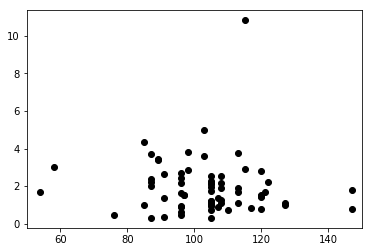

In [242]:
plt.clf()
plt.plot(np.array(dayage),tan_to_green, 'ok')
plt.xlim(50,150)
plt.show()

### no trend with age

In [241]:
tan_to_green

array([  0.46638317,   0.60483894,   2.83285189,   2.19840425,
         1.1028092 ,   3.6124956 ,   3.80537154,   2.36438376,
         3.69462945,   4.35606955,   1.07744558,   1.87172613,
         0.34945696,   1.67215125,   0.43949702,   2.988813  ,
         2.21033019,   0.83765587,   0.83859843,   0.31711231,
         1.76906943,   0.75529343,   0.73336997,   2.90710376,
        10.82820828,   1.1926457 ,   0.30454594,   0.9059065 ,
         1.36688326,   1.23579883,   2.52394499,   2.18264703,
         1.69430149,   3.76103151,   1.00649343,   0.95255813,
         1.11454741,   1.7554731 ,   1.06809259,   1.92113953,
         1.35871745,   2.61594101,   2.79829683,   0.72479431,
         0.97072105,   1.088277  ,   0.92392288,   0.8958806 ,
         1.10669639,   2.14210526,   1.22413474,   1.39883124,
         0.79513079,   1.46947584,   1.54046741,   2.1195923 ,
         2.26674895,   1.95947504,   2.51852513,   1.55109327,
         1.51777401,   2.43993508,   2.6845707 ,   2.14

In [245]:
fkidney_spots = MetaData['SPOT2'].values[rosetta][mod0namecut][purecut]

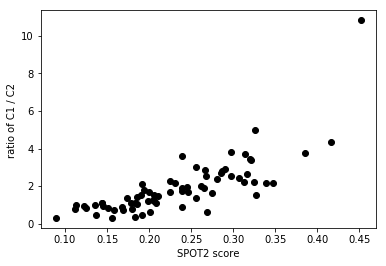

In [248]:
plt.clf()
plt.plot(np.array(fkidney_spots),tan_to_green, 'ok')
plt.ylabel('ratio of C1 / C2 ')
plt.xlabel('SPOT2 score')
#plt.xlim(50,150)
plt.show()

### pretty obvious trend with SPOT2 score 


In [253]:
Comp7cut =  (Basis[mod0namecut][:,7] > 0.2195)

In [254]:
len(Comp7cut[Comp7cut])

5

In [255]:
MetaData['Age'].values[rosetta][mod0namecut][Comp7cut]

array(['59D', '59D', '76D', '76D', '59D'], dtype=object)

In [257]:
dayage = []
for theage in list(MetaData['Age'].values[rosetta][mod0namecut]):
    if('D' in theage):
        dayage.append(float(theage.strip('D')))
    else:
        dayage.append(0) 
dayage = np.array(dayage)

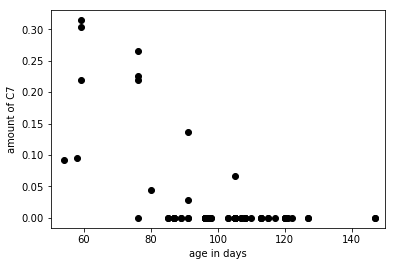

In [261]:
plt.clf()
plt.plot(dayage,Basis[mod0namecut][:,7], 'ok')
plt.ylabel('amount of C7')
plt.xlim([50,150])
plt.xlabel('age in days')
#plt.xlim(50,150)
plt.show()

In [278]:
Comp11cut =  (Basis[mod0namecut][:,11] > 0.11)

In [279]:
MetaData['SPOT2'].values[rosetta][mod0namecut][Comp11cut]

array([ 0.5439,  0.4436,  0.5256])

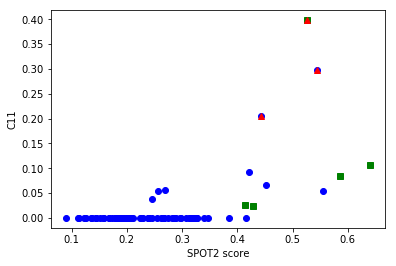

In [291]:
plt.clf()
plt.plot(MetaData['SPOT2'].values[rosetta][mod0namecut], Basis[mod0namecut][:,11], 'ob')
plt.plot(MetaData['SPOT2'].values[rosetta][mod0namecut][Comp7cut], Basis[mod0namecut][Comp7cut][:,11], 'sg')
plt.plot(MetaData['SPOT2'].values[rosetta][mod0namecut][Comp11cut], Basis[mod0namecut][Comp11cut][:,11], '^r')

plt.ylabel('C11')
plt.xlabel('SPOT2 score')
#plt.xlim(50,150)
plt.show()

In [284]:
MetaData.values[rosetta][mod0namecut][Comp11cut]

array([[301, 8812, 10113, 20786, 'AG8812', 'LN10113', 'DS20786', nan,
        'fKidney', 'fKidney', 'Fetal', 'Renal', nan, 'Kidney', 'Mesoderm',
        'fKidney', 'Fetal', 'Primary', '105D', 'M', nan, 'H24510', nan,
        nan, 'x', 1, 1, 1603, 0.5241, 0.5439, 333772.0, 130382101.0, nan,
        37619714.0, 351745561.0, nan, 78577158.0, 1047046.0, '2011-10-25',
        nan, 'Sucrose', 'DNaseI', 70.0, nan, nan, '2011-11-11', nan, 6.3,
        nan, nan, nan, 9990000.0, 70.0, 'A+Sucrose', nan, nan, nan, nan,
        nan],
       [341, 3941, 26814, 23873, 'AG3941', 'LN26814E', 'DS23873E', nan,
        'fKidney', 'fKidney', 'Fetal', 'Renal', nan, 'Kidney', 'Mesoderm',
        'fKidney', 'Fetal', 'Primary', '80D', 'F', nan, 'H25386', nan, nan,
        nan, 0, 0, 673, 0.2841, 0.4436, 258598.0, 116001345.0, 301882345.0,
        44576456.0, 284652780.0, 23767870.0, 37542049.0, 1578067.0,
        '2013-06-20', 'FC-121-2001 DNA TruSeq v2-Set A', 'Sucrose',
        'DNaseI', 60.0, nan, '6.39', '

In [286]:
pd.options.display.max_columns = 999

In [287]:
pd.DataFrame(MetaData.values[rosetta][mod0namecut][Comp11cut], columns=MetaData.columns)

,order (WM20170901),AG,LN,DS,AG_plus,LN_plus,DS_plus,repls,taxonomy,display name,class,system,subsystem,organ,germ layer,Description,Growth stage,Biological_state,Age,Sex,Ethnicity,Donor_ID,Alt_donor_ID,TC,Fyodor selection,USE in Bytestore,USE in Index,number unique hotspots,SPOT1,SPOT2,SPOT2_num_spots,SPOT2_num_bases,preseq_max,nuclear_dupes,reads_total,reads_adaptercontamination,reads_lowquality,reads_nonnuclear,lib_submission_date,lib_kit_method,lib_cleanup,lib_assay,lib_dhs_units,lib_frag_analyzer_conc,lib_nuclei_acid_ng,sample_creation_date,sample_dhs_time_minutes,sample_dhs_mg_per_mil_nuclei,sample_dhs_volume_ml,sample_dhs_percent_igepal,sample_dhs_percent_loss,sample_dhs_nuclei_count,sample_dhs_dnasei_units,sample_dhs_protease_inhibitor,tissueculture_creation_date,fractionation_id,fractionation_method,fractionation_yield,fractionation_num_nuclei
0,301,8812,10113,20786,AG8812,LN10113,DS20786,NaN,fKidney,fKidney,Fetal,Renal,NaN,Kidney,Mesoderm,fKidney,Fetal,Primary,105D,M,NaN,H24510,NaN,NaN,x,1,1,1603,0.5241,0.5439,333772,1.30382e+08,NaN,3.76197e+07,3.51746e+08,NaN,7.85772e+07,1.04705e+06,2011-10-25,NaN,Sucrose,DNaseI,70,NaN,NaN,2011-11-11,NaN,6.3,NaN,NaN,NaN,9.99e+06,70,A+Sucrose,NaN,NaN,NaN,NaN,NaN
1,341,3941,26814,23873,AG3941,LN26814E,DS23873E,NaN,fKidney,fKidney,Fetal,Renal,NaN,Kidney,Mesoderm,fKidney,Fetal,Primary,80D,F,NaN,H25386,NaN,NaN,NaN,0,0,673,0.2841,0.4436,258598,1.16001e+08,3.01882e+08,4.45765e+07,2.84653e+08,2.37679e+07,3.7542e+07,1.57807e+06,2013-06-20,FC-121-2001 DNA TruSeq v2-Set A,Sucrose,DNaseI,60,NaN,6.39,2013-05-28,NaN,9.4,1.5,NaN,NaN,4.98e+06,60,A+Sucrose,NaN,NaN,NaN,NaN,NaN
2,302,5524,26921,24709,AG5524,LN26921A,DS24709A,NaN,fKidney,fKidney,Fetal,Renal,NaN,Kidney,Mesoderm,Kidney,Fetal,Primary,59D,F,NaN,H25566,NaN,NaN,x,0,1,4572,0.4633,0.5256,373218,1.44787e+08,4.61982e+08,1.05524e+08,6.4292e+08,1.9464e+07,1.55325e+08,6.93936e+06,2013-10-16,FC-121-1001 DNA TruSeq - Set A,Sucrose,DNaseI,60,NaN,17.8,2013-10-09,NaN,5.3,NaN,NaN,NaN,4.14e+06,60,A+Sucrose,NaN,NaN,NaN,NaN,NaN


In [289]:
pd.DataFrame(MetaData.values[rosetta][mod0namecut], columns=MetaData.columns)

,order (WM20170901),AG,LN,DS,AG_plus,LN_plus,DS_plus,repls,taxonomy,display name,class,system,subsystem,organ,germ layer,Description,Growth stage,Biological_state,Age,Sex,Ethnicity,Donor_ID,Alt_donor_ID,TC,Fyodor selection,USE in Bytestore,USE in Index,number unique hotspots,SPOT1,SPOT2,SPOT2_num_spots,SPOT2_num_bases,preseq_max,nuclear_dupes,reads_total,reads_adaptercontamination,reads_lowquality,reads_nonnuclear,lib_submission_date,lib_kit_method,lib_cleanup,lib_assay,lib_dhs_units,lib_frag_analyzer_conc,lib_nuclei_acid_ng,sample_creation_date,sample_dhs_time_minutes,sample_dhs_mg_per_mil_nuclei,sample_dhs_volume_ml,sample_dhs_percent_igepal,sample_dhs_percent_loss,sample_dhs_nuclei_count,sample_dhs_dnasei_units,sample_dhs_protease_inhibitor,tissueculture_creation_date,fractionation_id,fractionation_method,fractionation_yield,fractionation_num_nuclei
0,34,8837,10052,20079,AG8837,LN10052,DS20079,NaN,fStomach,fStomach,Fetal,Digestive,NaN,Stomach,Endoderm,Stomach,Fetal,Primary,96D,F,NaN,H24365,NaN,NaN,NaN,0,0,2,0.2946,0.1918,87031,3.38427e+07,NaN,4.79243e+06,6.92389e+07,NaN,1.3108e+07,297918,2011-08-04,NaN,NaN,DNaseI,80,NaN,NaN,2011-09-14,NaN,NaN,1,NaN,NaN,3.69e+06,80,A+Sucrose,NaN,NaN,NaN,NaN,NaN
1,24,8836,10053,19933,AG8836,LN10053,DS19933,NaN,fStomach,fStomach,Fetal,Digestive,NaN,Stomach,Endoderm,Stomach,Fetal,Primary,96D,F,NaN,H24342,NaN,NaN,x,0,1,5,0.3037,0.2013,91458,3.33944e+07,NaN,4.77923e+06,7.06492e+07,NaN,1.54188e+07,408785,2011-07-25,NaN,NaN,DNaseI,80,NaN,NaN,2011-09-14,NaN,6.1,1,NaN,NaN,2.07e+06,80,A+Sucrose,NaN,NaN,NaN,NaN,NaN
2,337,8826,10076,20917,AG8826,LN10076,DS20917,NaN,fKidney Right,fKidney_R,Fetal,Renal,NaN,Kidney,Mesoderm,fKidney_R,Fetal,Primary,98D,F,NaN,H24568,NaN,NaN,x,0,1,4,0.3999,0.2665,98892,3.13934e+07,NaN,3.83909e+06,4.63622e+07,NaN,8.99445e+06,223406,2011-11-09,NaN,NaN,DNaseI,60,NaN,NaN,2011-12-04,NaN,2.3,NaN,NaN,NaN,5.26e+06,60,A+Sucrose,NaN,NaN,NaN,NaN,NaN
3,336,8825,10077,21340,AG8825,LN10077,DS21340,NaN,fKidney Right,fKidney_R,Fetal,Renal,NaN,Kidney,Mesoderm,fKidney_R,Fetal,Primary,87D,F,NaN,H24628,NaN,NaN,x,0,1,1,0.511,0.3244,83887,2.80252e+07,NaN,3.36487e+06,3.5242e+07,NaN,8.06835e+06,70453,2011-12-30,NaN,Sucrose,DNaseI,50,NaN,26.18,2012-01-29,NaN,4.9,1.5,NaN,NaN,5.25e+06,50,A+Sucrose,NaN,NaN,NaN,NaN,NaN
4,359,8824,10078,21044,AG8824,LN10078,DS21044,NaN,fKidney Right,fKidney_R,Fetal,Renal,NaN,Kidney,Mesoderm,fKidney_R,Fetal,Primary,108D,M,NaN,H24595,NaN,NaN,x,0,1,4,0.386,0.1829,59000,1.66629e+07,NaN,1.73245e+06,2.93521e+07,NaN,7.26322e+06,40436,2011-12-02,NaN,NaN,DNaseI,60,NaN,NaN,2011-12-19,NaN,9.8,NaN,NaN,NaN,1.308e+07,60,A+Sucrose,NaN,NaN,NaN,NaN,NaN
5,338,8823,10079,20445,AG8823,LN10079,DS20445,NaN,h.f.Kidney.Cortex,fKidney_renal_cortex,Fetal,Renal,NaN,Kidney,Mesoderm,Kidney.cortex,Fetal,Primary,103D,F,NaN,H24477,NaN,NaN,x,0,1,7,0.347,0.2395,113718,3.40502e+07,NaN,5.02758e+06,6.10868e+07,NaN,1.40093e+07,167792,2011-09-22,NaN,NaN,DNaseI,60,NaN,NaN,2011-10-18,NaN,5.2,NaN,NaN,NaN,1.094e+07,60,A+Sucrose,NaN,NaN,NaN,NaN,NaN
6,339,8822,10080,20920,AG8822,LN10080,DS20920,NaN,fKidney Left,fKidney_L,Fetal,Renal,NaN,Kidney,Mesoderm,fKidney_L,Fetal,Primary,98D,F,NaN,H24568,NaN,NaN,x,0,1,8,0.4233,0.2977,117151,4.12331e+07,NaN,5.88729e+06,5.86016e+07,NaN,9.93913e+06,194018,2011-11-09,NaN,NaN,DNaseI,60,NaN,NaN,2011-12-04,NaN,3.6,NaN,NaN,NaN,6.32e+06,60,A+Sucrose,NaN,NaN,NaN,NaN,NaN
7,335,8821,10081,21344,AG8821,LN10081,DS21344,NaN,fKidney Left,fKidney_L,Fetal,Renal,NaN,Kidney,Mesoderm,fKidney_L,Fetal,Primary,87D,F,NaN,H24626,NaN,NaN,x,0,1,1,0.4433,0.2812,91407,3.272e+07,NaN,3.90193e+06,4.92227e+07,NaN,1.27466e+07,140561,2011-12-30,NaN,Sucrose,DNaseI,60,NaN,27.72,2012-01-29,NaN,2.1,1,NaN,NaN,3.78e+06,60,A+Sucrose,NaN,NaN,NaN,NaN,NaN
8,334,8820,10082,20953,AG8820,LN10082,DS20953,NaN,fKidney Left,fKidney_L,Fetal,Renal,NaN,Kidney,Mesoderm,fKidney_L,Fetal,Primary,87D,F,NaN,H24582,NaN,NaN,x,0,1,17,0.4604,0.3137,114577,3.85659e+07,NaN,5.49925e+06,5.47819e+07,NaN,1.27941e+07,165145,2011-11-15,NaN,NaN,DNaseI,

## check out C7 for all fetal samples  also all adults